# 

# Merge and transform mapping data

In [ ]:
import pandas as pd
import numpy as np
from bioinfokit.analys import norm, get_data
import seaborn as sns
import matplotlib.pyplot as plt

mapping_data_folder='/home/davidmartins/Documentos/Viral_analysis/contig_mapping'

samples = [
    f'{mapping_data_folder}/IT1_A_vs_marabaviralDB_idxstats.txt',
    f'{mapping_data_folder}/IT1_B_vs_marabaviralDB_idxstats.txt',
    f'{mapping_data_folder}/IT1_C_vs_marabaviralDB_idxstats.txt',
    f'{mapping_data_folder}/IT2_A_vs_marabaviralDB_idxstats.txt',
    f'{mapping_data_folder}/IT2_B_vs_marabaviralDB_idxstats.txt',
    f'{mapping_data_folder}/IT2_C_vs_marabaviralDB_idxstats.txt',
    f'{mapping_data_folder}/IT3_A_vs_marabaviralDB_idxstats.txt',
    f'{mapping_data_folder}/IT3_B_vs_marabaviralDB_idxstats.txt',
    f'{mapping_data_folder}/IT3_C_vs_marabaviralDB_idxstats.txt',
    f'{mapping_data_folder}/IT4_A_vs_marabaviralDB_idxstats.txt',
    f'{mapping_data_folder}/IT4_B_vs_marabaviralDB_idxstats.txt',
    f'{mapping_data_folder}/IT4_C_vs_marabaviralDB_idxstats.txt',
]


def mergeDataFrame(filelist):
    df0 = pd.read_csv(f'{mapping_data_folder}/IT1_A_vs_marabaviralDB_idxstats.txt', sep='\t',names=['contig_id','length','Mapped','Unmapped'])
    df0 = df0[['contig_id','length']]
    df = pd.DataFrame()
    temp_df= pd.DataFrame()
    for file in filelist:
        temp_df = pd.read_csv(file, sep='\t',names=['contig_id','length','Mapped','Unmapped'])
        temp_df = pd.DataFrame({
            'contig_id':temp_df['contig_id'],
            f"{file.replace('_vs_marabaviralDB_idxstats.txt','').replace(f'{mapping_data_folder}/','')}":temp_df['Mapped']
        })
        if df.empty:
            df = temp_df 
        else:
            df = pd.merge(df, temp_df, on='contig_id', how='outer')
    df = pd.merge(df, df0, on='contig_id', how='outer')
    #df = df.drop(df.index[-1])
    return df
    
df = mergeDataFrame(samples)
df = df.drop(df.index[-1])

df = df.set_index('contig_id')

df = df.reset_index()
#df.to_csv('itac_contigs_raw_reads.tsv',sep='\t',index=False)

df = df.set_index('contig_id')
nm = norm()
nm.tpm(df=df, gl='length')

# get TPM normalized dataframe
tpm_df = nm.tpm_norm

#tpm_df.to_csv('itac_contigs_tpm_norm.tsv',sep='\t',index=False)

#Log Transformation
log_trans = tpm_df.map(lambda x: np.log(x + 1))
#log_trans = log_trans.reset_index()
log_trans.to_csv('viral_log_trans_viral_mapped.tsv',sep='\t')
log_trans


In [2]:
log_trans = pd.read_csv("~/Documentos/viral_analysis_v2/contig_mapping/viral_log_trans_abund.tsv", sep='\t')
log_trans

,contig_id,IT1_A,IT1_B,IT1_C,IT2_A,IT2_B,IT2_C,IT3_A,IT3_B,IT3_C,IT4_A,IT4_B,IT4_C
0,IT1_2001379,4.319064,4.243035,4.552375,4.310583,4.177022,4.179062,4.283205,4.352164,4.246693,4.503248,4.436059,4.481039
1,IT1_2003565,5.368565,5.246276,4.981570,5.499131,5.226748,5.429117,5.254509,4.645005,4.350140,3.281555,3.356303,3.319220
2,IT1_2003979,4.424970,4.519449,4.391303,4.546071,4.543140,4.445113,4.041062,4.228728,4.304219,3.886097,3.932434,3.954911
3,IT1_2004241,5.214472,5.206925,4.844512,5.101639,5.204442,5.355367,5.107495,5.241052,4.863432,4.697562,4.776595,4.844626
4,IT1_2004336,6.391171,6.437415,6.304170,6.440087,6.333797,6.509647,6.661371,6.092006,6.182838,5.712152,5.696537,5.735551
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18204,IT4_998649,3.198712,3.890315,3.842249,3.648118,3.964910,2.982197,3.970426,4.217706,4.346427,4.435053,4.531847,4.463676
18205,IT4_998817,3.521198,3.705460,3.387145,3.803483,3.852226,3.601652,3.984652,3.694107,4.195828,4.306100,4.307742,4.181750
18206,IT4_999078,2.414163,2.751679,2.478392,2.240839,2.461524,3.210905,3.485957,3.087552,3.498299,3.660939,3.449416,3.681149
18207,IT4_999428,2.512517,2.080699,3.076904,2.845555,3.045625,2.403021,3.108697,3.004120,3.458797,3.621554,3.487512,3.272720


# Extract contig taxonomies from geNomad

In [1]:
import pandas as pd

genomad_folder='/home/davidmartins/Documentos/viral_analysis_v2/genomad'


df1 = pd.read_csv(f'{genomad_folder}/MP2_final_filtered_taxonomy.tsv',sep='\t')
df2 = pd.read_csv(f'{genomad_folder}/MP3_final_filtered_taxonomy.tsv',sep='\t')
df3 = pd.read_csv(f'{genomad_folder}/MP4_final_filtered_taxonomy.tsv',sep='\t')
df4 = pd.read_csv(f'{genomad_folder}/MP5_final_filtered_taxonomy.tsv',sep='\t')


df_tax = pd.concat([df1,df2,df3,df4])
df_tax = df_tax[['seq_name','lineage']]
df_tax = df_tax.rename(columns={'seq_name':'contig_id'})

df_tax = df_tax.set_index('contig_id')
#df_tax = modify_contig_names(df_tax)
df_tax = df_tax.reset_index()
df_tax


,contig_id,lineage
0,IT1_3663654,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...
1,IT1_4749186,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...
2,IT1_2849540,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...
3,IT1_2578173,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...
4,IT1_3754150,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...
...,...,...
17972,IT4_3856814,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...
17973,IT4_3284688,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...
17974,IT4_2750110,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...
17975,IT4_2291360,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...


In [5]:
#Merge tables
df_combined = pd.merge(df_tax, log_trans, how='outer', on=['contig_id'])
df_combined = df_combined.replace('Viruses;;;;;;','Unclassified')
df_combined = df_combined.fillna('Unclassified')
df_combined = pd.DataFrame({
    'Taxonomy':df_combined['lineage'],
    'IT1':df_combined.iloc[:,2:5].sum(axis=1)/3,
    'IT2':df_combined.iloc[:,5:8].sum(axis=1)/3,
    'IT3':df_combined.iloc[:,8:11].sum(axis=1)/3,
    'IT4':df_combined.iloc[:,11:15].sum(axis=1)/3
})
########################################
df_combined = df_combined.groupby('Taxonomy').sum()

total = df_combined.sum()
perc = (df_combined / total) * 100
perc.head(10)

,IT1,IT2,IT3,IT4
Taxonomy,,,,
Unclassified,1.286503,1.309179,1.307399,1.279094
Viruses;;;;;;Itzamnaviridae,0.003907,0.003075,0.004687,0.005561
Viruses;Duplodnaviria;Heunggongvirae;Peploviricota;Herviviricetes;Herpesvirales;Orthoherpesviridae,0.003827,0.003885,0.005120,0.004711
Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes;;,80.106561,79.738669,79.186889,79.248645
Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes;;Ackermannviridae,0.151302,0.150021,0.147551,0.149908
Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes;;Arenbergviridae,0.050298,0.051039,0.052115,0.051093
Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes;;Autographiviridae,1.393934,1.429128,1.432022,1.437254
Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes;;Casjensviridae,0.005107,0.005169,0.007787,0.005145
Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes;;Chimalliviridae,0.000000,0.000000,0.006187,0.004800


In [ ]:
df_combined = df_combined.groupby('Taxonomy').sum()

total = df_combined.sum()
perc = (df_combined / total) * 100
#perc.to_csv('viral_tax_percentages.tsv',sep='\t')

classified = df_combined
classified = classified.drop('Unclassified')
classified = classified.drop('Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes;;')
classified['total'] = classified.iloc[:,:4].sum(axis=1)
classified = classified.sort_values(by='total',ascending=False)
classified = classified.head(10)
classified = classified.drop(columns='total')


total = classified.sum()
perc = (classified / total) * 100
perc = perc.T
perc

Taxonomy,Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes;;Kyanoviridae,Viruses;Varidnaviria;Bamfordvirae;Nucleocytoviricota;Megaviricetes;Algavirales;Phycodnaviridae,Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes;;Autographiviridae,Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes;;Stanwilliamsviridae,Viruses;Varidnaviria;Bamfordvirae;Nucleocytoviricota;Megaviricetes;Imitervirales;Mimiviridae,Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes;;Straboviridae,Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes;Crassvirales;,Viruses;Varidnaviria;Bamfordvirae;Nucleocytoviricota;Megaviricetes;;,Viruses;Varidnaviria;Bamfordvirae;Nucleocytoviricota;Megaviricetes;Imitervirales;,Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes;;Ackermannviridae
IT1,69.787819,10.144151,7.781720,3.019021,2.347678,1.883291,1.730510,1.370094,1.091062,0.844654
IT2,69.990415,10.110109,7.821742,2.880303,2.344358,1.865898,1.665753,1.393268,1.107076,0.821080
IT3,70.871801,9.612071,7.622804,2.843778,2.248810,1.893312,1.679998,1.362833,1.079164,0.785430
IT4,70.883185,9.649597,7.671781,2.834263,2.222746,1.889840,1.698460,1.314469,1.035479,0.800180


## Plot the crassphage relative abundance clustermap

[None, None, None, None, None, None, None, None, None, None, None, None]

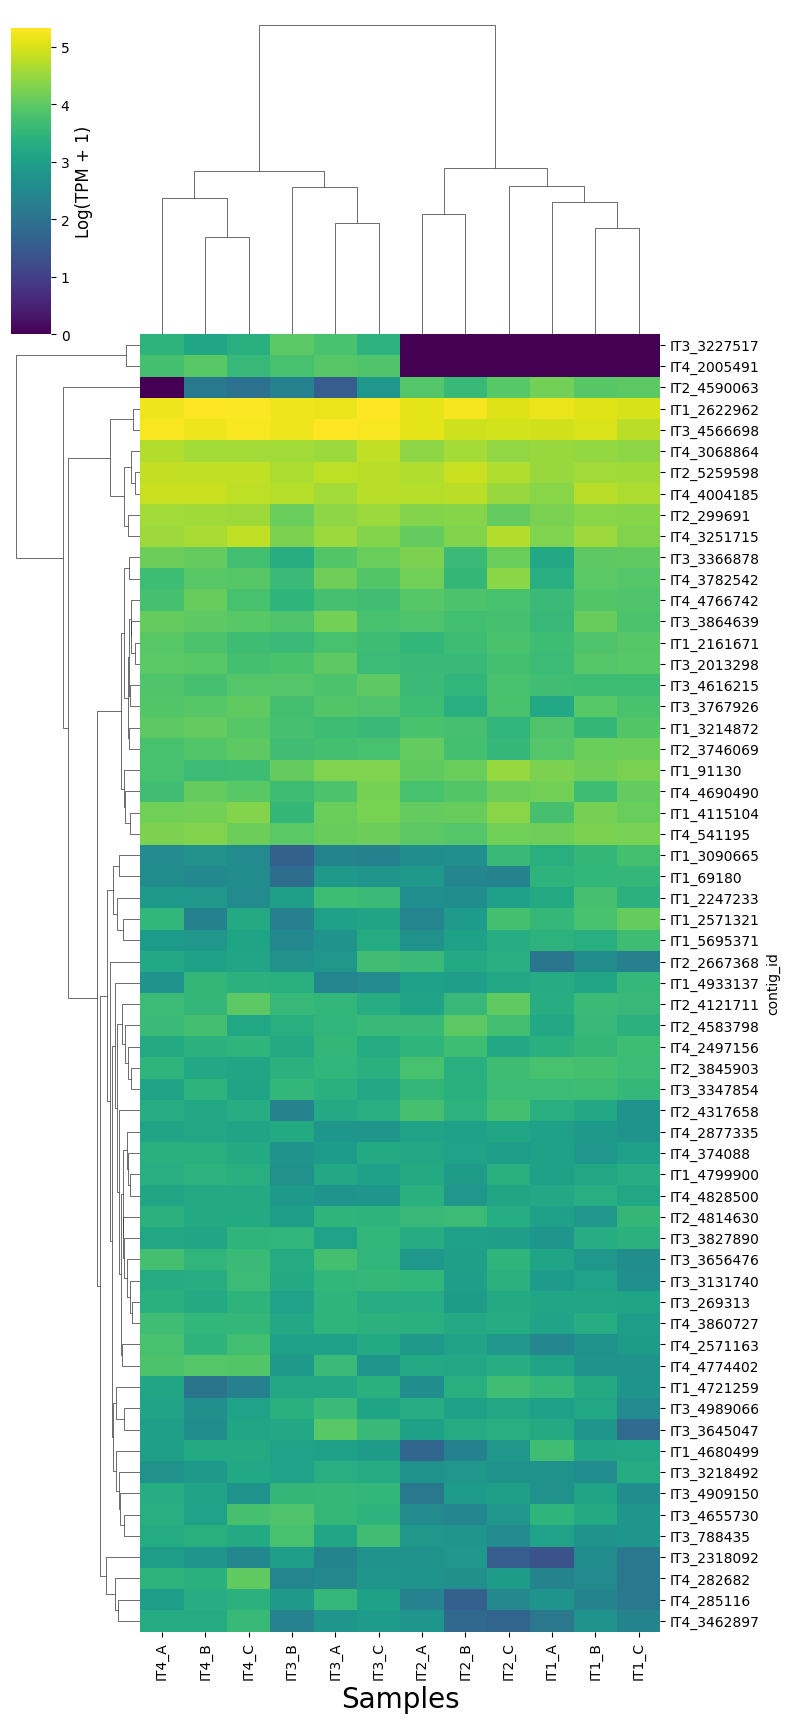

In [ ]:
crass = df_tax[df_tax['lineage'].isin(['Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes;Crassvirales;', 'Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes;Crassvirales;Suoliviridae'])]
crass = pd.merge(crass, log_trans, how='inner', on=['contig_id'])
crass = crass.set_index('contig_id')
crass = crass.drop(columns='lineage')

g = sns.clustermap(crass, cmap="viridis",  figsize=(8, 17),linecolor='black')

g.ax_heatmap.set_xlabel('Samples', fontsize=20)
cbar = g.ax_heatmap.collections[0].colorbar
cbar.set_label('Log(TPM + 1)', fontsize=12)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90)

# Calculate correlations between crassphages and environmental data

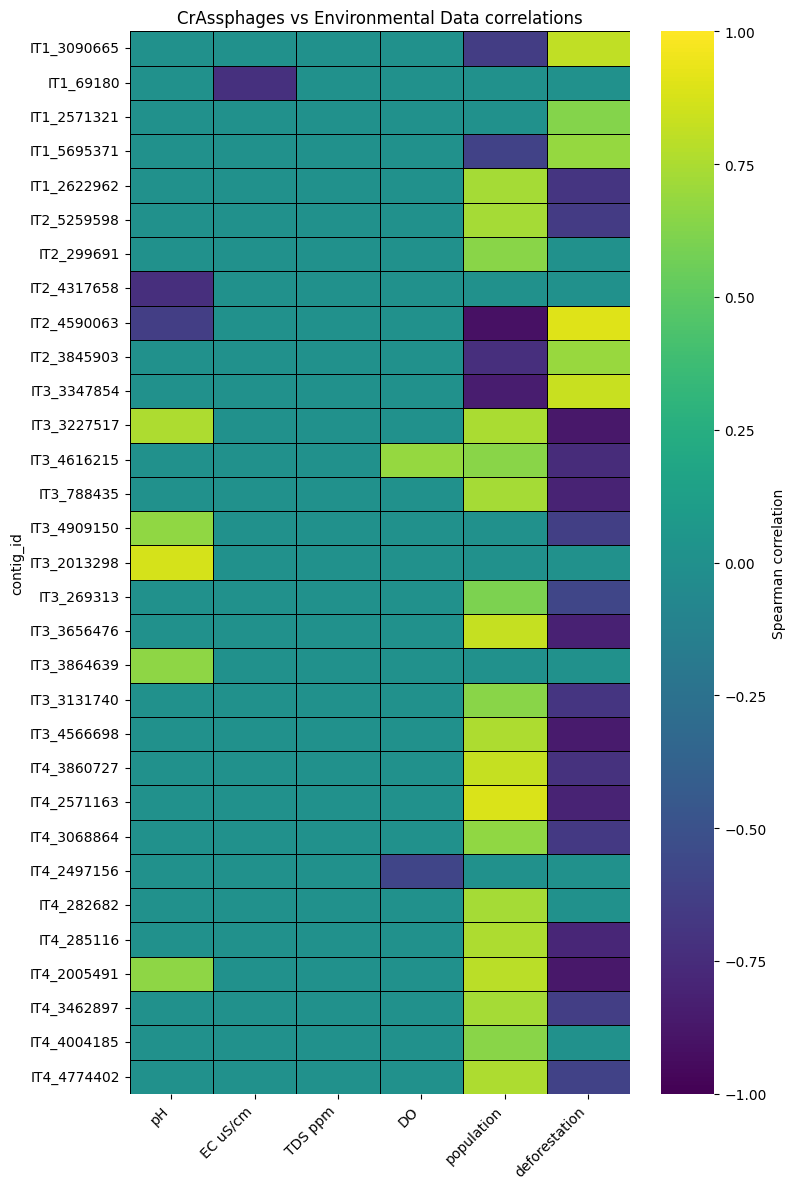

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr

# Load the data
viral_abundances = crass.T

env_data = pd.read_csv('env_data_log_trans.tsv',sep='\t')
env_data = env_data.drop('contig_id', axis=1)

# Initialize a DataFrame to store the correlation coefficients and p-values
correlation_matrix = pd.DataFrame(index=viral_abundances.columns, columns=env_data.columns)
p_value_matrix = pd.DataFrame(index=viral_abundances.columns, columns=env_data.columns)

# Calculate the correlations and p-values
for virus in viral_abundances.columns:
    for env in env_data.columns:
        corr, p_value = spearmanr(viral_abundances[virus], env_data[env])
        correlation_matrix.loc[virus, env] = corr
        p_value_matrix.loc[virus, env] = p_value

# Mask the non-significant correlations (e.g., p-value > 0.05)
significance_mask = p_value_matrix <= 0.05
significant_correlations = correlation_matrix.where(significance_mask)

# Filter to include only viruses with at least one significant correlation
viruses_with_significant_correlations = significant_correlations.dropna(how='all')
viruses_with_significant_correlations = viruses_with_significant_correlations.fillna(0)
#viruses_with_significant_correlations.to_csv('crass_correlations.tsv',sep='\t')
#viruses_with_significant_correlations.to_csv("viruses_with_significant_correlations.tsv",sep='\t')
#crass_pos_corr = viruses_with_significant_correlations[viruses_with_significant_correlations['population']>0]
#crass_pos_corr = crass_pos_corr.reset_index()
#crass_pos_corr = crass_pos_corr['contig_id']
#crass_pos_corr.to_csv('/home/davidmartins/Documentos/viral_analysis_v2/DRAMv/crass_pos_corr.txt', index=False)

#Plot the heatmap
plt.figure(figsize=(8, 12))
sns.heatmap(viruses_with_significant_correlations.astype(float), annot=False, cmap='viridis', vmin=-1, vmax=1, cbar_kws={'label': 'Spearman correlation'}, linewidths=0.5, linecolor='black')
plt.title('CrAssphages vs Environmental Data correlations')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()

# Extract crassphage contigs posetively correlated to population density

In [29]:
pos_pop_coor = viruses_with_significant_correlations[viruses_with_significant_correlations['population'] > 0]
pos_pop_coor = pos_pop_coor.reset_index()
pos_pop_coor = pos_pop_coor[['contig_id']]

it1_pos_pop_coor = pos_pop_coor[pos_pop_coor['contig_id'].str.startswith('IT1')]
it2_pos_pop_coor = pos_pop_coor[pos_pop_coor['contig_id'].str.startswith('IT2')]
it3_pos_pop_coor = pos_pop_coor[pos_pop_coor['contig_id'].str.startswith('IT3')]
it4_pos_pop_coor = pos_pop_coor[pos_pop_coor['contig_id'].str.startswith('IT4')]

#it1_pos_pop_coor.to_csv('../05_annotation_processing/it1_crass_pos_pop_coor.tsv',sep='\t',index=False)
#it2_pos_pop_coor.to_csv('../05_annotation_processing/it1_crass_pos_pop_coor.tsv',sep='\t',index=False)
#it3_pos_pop_coor.to_csv('../05_annotation_processing/it1_crass_pos_pop_coor.tsv',sep='\t',index=False)
#it4_pos_pop_coor.to_csv('../05_annotation_processing/it1_crass_pos_pop_coor.tsv',sep='\t',index=False)